# Loading The Dataset

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("Electronic_dataset.csv")

In [13]:
data.shape

(500000, 4)

In [14]:
data.tail()

,user_id,prod_id,ratings,timestamp
499995,AT1DOX4N48TXJ,B000P3X7RK,2.0,1210291200
499996,A224J6BHKCLMJM,B005CPGHAA,4.0,1359244800
499997,A23WSQC26QEFLC,B006FLK1IE,5.0,1323302400
499998,ARHZCDAH1UTPN,B006W5FHI2,5.0,1361577600
499999,A9XU2MMIWGZBT,B001JJRBU8,4.0,1237420800


Tried with 10% data with 50000 but its still very heavy fro my system, so considering 25000 count of data

In [15]:
sub_data = data.head(25000)

In [16]:
sub_data.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [17]:
sub_data.shape

(25000, 4)

In [18]:
sub_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,25000.0,4.009960e+00,1.386022e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,25000.0,1.338547e+09,6.882918e+07,944611200.0,1.316131e+09,1.361146e+09,1.386288e+09,1.406074e+09


In [19]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
user_id      25000 non-null object
prod_id      25000 non-null object
ratings      25000 non-null float64
timestamp    25000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 781.4+ KB


In [20]:
sub_data.drop(columns='timestamp',inplace=True)

In [21]:
sub_data.head()

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [22]:
sub_data.rename(columns={'user_id' : 'User_ID','prod_id' : 'Product_ID','ratings' : 'Ratings'},inplace=True)

C:\Users\sridhar\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


(array([ 2923.,     0.,  1470.,     0.,     0.,  1941.,     0.,  4767.,
            0., 13899.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

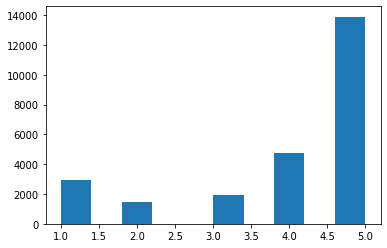

In [23]:
plt.hist(x=sub_data['Ratings'])

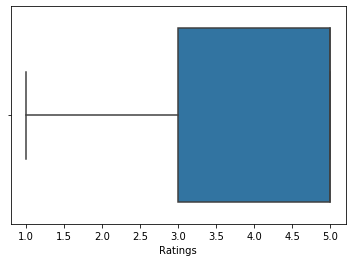

In [24]:
sns.boxplot(x='Ratings',data = sub_data)

In [25]:
sub_data.groupby('Product_ID')['Ratings'].mean().head()

Product_ID
0972683275    5.0
1400501466    1.0
1400501520    5.0
1400501776    3.0
1400532620    1.0
Name: Ratings, dtype: float64

In [26]:
sub_data.groupby('Product_ID')['Ratings'].mean().sort_values(ascending=False).head()  

Product_ID
B00LMOH8DU    5.0
B003S5SOLG    5.0
B003SSCEW8    5.0
B003SRVQQY    5.0
B003SQS7XU    5.0
Name: Ratings, dtype: float64

In [27]:
sub_data.groupby('Product_ID')['Ratings'].count().sort_values(ascending=False).head()  

Product_ID
B00DR0PDNE    54
B007WTAJTO    51
B0074BW614    47
B006GWO5WK    43
B003ES5ZUU    41
Name: Ratings, dtype: int64

In [28]:
ratings_mean_count = pd.DataFrame(sub_data.groupby('Product_ID')['Ratings'].mean().sort_values(ascending=False)) 

In [29]:
ratings_mean_count.head()

,Ratings
Product_ID,
B00LMOH8DU,5.0
B003S5SOLG,5.0
B003SSCEW8,5.0
B003SRVQQY,5.0
B003SQS7XU,5.0


In [30]:
ratings_mean_count['Rating_counts'] = pd.DataFrame(sub_data.groupby('Product_ID')['Ratings'].count())  

The Popularity Based recommendations can be found in below DataFrame

In [31]:
ratings_mean_count.head()  

,Ratings,Rating_counts
Product_ID,,
B00LMOH8DU,5.0,1
B003S5SOLG,5.0,4
B003SSCEW8,5.0,1
B003SRVQQY,5.0,1
B003SQS7XU,5.0,1


# Observations:
- Since all the Products(ASINs:Amazon Standard Identification Number) are Unique so the rating count is 1.
- Lets try to build the model with the Products which is rated more than 10 times by the customers and compare

In [32]:
filtered_data = data.groupby('user_id').filter(lambda x:len(x)>10)
filtered_data.head() 

,user_id,prod_id,ratings,timestamp
264,A1YEPFLLH42OU1,B00E3W15P0,5.0,1404086400
413,A10Y058K7B96C6,B005HSG3VK,5.0,1325030400
526,A3EZEP0FX5BC1P,B0044DHU84,4.0,1296086400
719,A17HMM1M7T9PJ1,B00ESKS0KU,4.0,1394496000
913,A15CL28ALB7MTZ,B001QFYCXO,4.0,1245283200


In [34]:
filtered_data.shape

(1595, 4)

In [35]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 264 to 499916
Data columns (total 4 columns):
user_id      1595 non-null object
prod_id      1595 non-null object
ratings      1595 non-null float64
timestamp    1595 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.3+ KB


In [36]:
filtered_data.drop(columns='timestamp',inplace=True)

C:\Users\sridhar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
filtered_data.head()

,user_id,prod_id,ratings
264,A1YEPFLLH42OU1,B00E3W15P0,5.0
413,A10Y058K7B96C6,B005HSG3VK,5.0
526,A3EZEP0FX5BC1P,B0044DHU84,4.0
719,A17HMM1M7T9PJ1,B00ESKS0KU,4.0
913,A15CL28ALB7MTZ,B001QFYCXO,4.0


In [38]:
filtered_data.rename(columns={'user_id' : 'User_ID','prod_id' : 'Product_ID','ratings' : 'Ratings'},inplace=True)

C:\Users\sridhar\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


# Data Analysis

In [39]:
filtered_data['User_ID'].value_counts()

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
                  ..
A2KYRPDKVBI2R4    11
A6VXZ1EEPRTLV     11
A1MEISNED4NP7U    11
A34BZM6S9L7QI4    11
A2QDOJFFLFGF18    11
Name: User_ID, Length: 108, dtype: int64

In [40]:
filtered_data['Product_ID'].value_counts()

B0088CJT4U    5
B007WTAJTO    4
B001E1Y5O6    4
B004T9RR6I    4
B006GWO5WK    4
             ..
B001CE5LNY    1
B00F9Q5E5G    1
B001QGT1CA    1
B006CFU61U    1
B00ADM79N6    1
Name: Product_ID, Length: 1479, dtype: int64

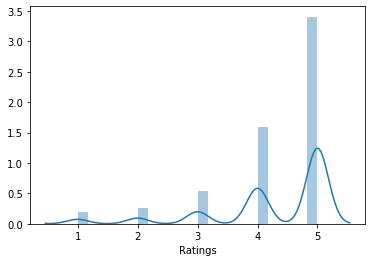

In [41]:
sns.distplot(filtered_data['Ratings'])

In [42]:
###Checking unique customers and products
print("The number of unique products in the data is:", len(filtered_data['Product_ID'].unique()))
print("The number of unique customers in the data is:", len(filtered_data['User_ID'].unique()))

The number of unique products in the data is: 1479
The number of unique customers in the data is: 108


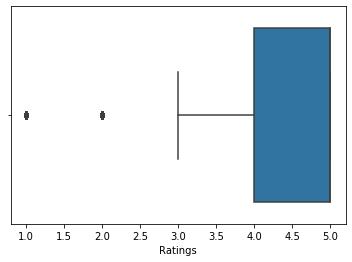

In [43]:
sns.boxplot(filtered_data['Ratings'])

In [44]:
filtered_data.groupby('Product_ID')['Ratings'].mean().head()  

Product_ID
B00000DM9M    5.0
B00000J1US    5.0
B00000K0JC    5.0
B000028F42    2.0
B00004R8VC    5.0
Name: Ratings, dtype: float64

In [45]:
filtered_data.groupby('Product_ID')['Ratings'].mean().sort_values(ascending=False).head()

Product_ID
B00L2442H0    5.0
B002TMRZOQ    5.0
B0032ANC8M    5.0
B0031AQ302    5.0
B00310V8IY    5.0
Name: Ratings, dtype: float64

In [46]:
filtered_data.groupby('Product_ID')['Ratings'].count().sort_values(ascending=False).head()

Product_ID
B0088CJT4U    5
B006GWO5WK    4
B007WTAJTO    4
B004T9RR6I    4
B001E1Y5O6    4
Name: Ratings, dtype: int64

In [47]:
ratings_mean_count = pd.DataFrame(filtered_data.groupby('Product_ID')['Ratings'].mean()) 

In [48]:
ratings_mean_count['rating_counts'] = pd.DataFrame(filtered_data.groupby('Product_ID')['Ratings'].count())  

In [49]:
ratings_mean_count.head()

,Ratings,rating_counts
Product_ID,,
B00000DM9M,5.0,1
B00000J1US,5.0,1
B00000K0JC,5.0,1
B000028F42,2.0,1
B00004R8VC,5.0,1


Below are the top 5 product ids that can be recommended as part of the popularity based recommendation model

In [50]:
ratings = pd.DataFrame(filtered_data.groupby('Product_ID')['Ratings'].mean())
ratings.head()

,Ratings
Product_ID,
B00000DM9M,5.0
B00000J1US,5.0
B00000K0JC,5.0
B000028F42,2.0
B00004R8VC,5.0


In [51]:
ratings['number_of_ratings'] = filtered_data.groupby('Product_ID')['Ratings'].count()
ratings.head()

,Ratings,number_of_ratings
Product_ID,,
B00000DM9M,5.0,1
B00000J1US,5.0,1
B00000K0JC,5.0,1
B000028F42,2.0,1
B00004R8VC,5.0,1


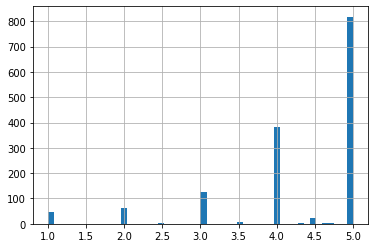

In [52]:
ratings['Ratings'].hist(bins=50)

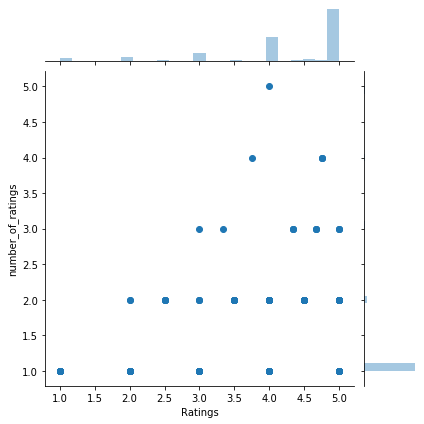

In [53]:
sns.jointplot(x='Ratings', y='number_of_ratings', data=ratings)

# User-User Collaborative Filtering model

In [54]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [55]:
from surprise import Reader
from surprise import Dataset


In [56]:
reader = Reader(rating_scale=(1, 5))

In [57]:
data_s = Dataset.load_from_df(filtered_data[['User_ID', 'Product_ID', 'Ratings']], reader)

In [58]:
train, test = train_test_split(data_s, test_size=.30,random_state = 1)

In [59]:
algo = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [60]:
#First Predicting for a User's rating for a random Product
uid1 = str('A1JZQ2OUL5863V')  
iid1 = str('B004VM0SE6')

In [61]:
pred1 = algo.predict(uid1, iid1, verbose=True)

user: A1JZQ2OUL5863V item: B004VM0SE6 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [62]:
#Second Predicting for a User's rating for a random Product

uid2 = str('AGXRXRF58OH6H')  
iid2 = str('B001QWU1R8')

In [63]:
pred2 = algo.predict(uid2, iid2, verbose=True)

user: AGXRXRF58OH6H item: B001QWU1R8 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [64]:
test_pred = algo.test(test)

In [65]:
test_pred

[Prediction(uid='ARBKYIVNYWK3C', iid='B009A6CZYY', r_ui=4.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A11KZ906QD08C5', iid='B003ASUEP0', r_ui=5.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3NHUQ33CFH3VM', iid='B00EHDTQQ0', r_ui=5.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11KZ906QD08C5', iid='B00HPM1FZ0', r_ui=3.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ALDAF4VVLFRHP', iid='B000HEW0KW', r_ui=5.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A4WEZJOIZIV4U', iid='B0042KFLJ4', r_ui=5.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A15QYHQH80W30L', iid='B00419V4L0', r_ui=5.0, est=4.30376344

In [66]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0726


1.0725781309937685

In [67]:
test_pred[103]

Prediction(uid='ARBKYIVNYWK3C', iid='B002MMY4WY', r_ui=4.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [68]:
test_pred[58]

Prediction(uid='AGOH8N902URMW', iid='B0014KKV7W', r_ui=5.0, est=4.303763440860215, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [69]:
#Convert the predictions into a DataFrame
predictions = pd.DataFrame(test_pred)
predictions.head()

,uid,iid,r_ui,est,details
0,ARBKYIVNYWK3C,B009A6CZYY,4.0,4.000000,"{'actual_k': 0, 'was_impossible': False}"
1,A11KZ906QD08C5,B003ASUEP0,5.0,4.303763,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3NHUQ33CFH3VM,B00EHDTQQ0,5.0,4.303763,"{'was_impossible': True, 'reason': 'User and/o..."
3,A11KZ906QD08C5,B00HPM1FZ0,3.0,4.303763,"{'was_impossible': True, 'reason': 'User and/o..."
4,ALDAF4VVLFRHP,B000HEW0KW,5.0,4.303763,"{'was_impossible': True, 'reason': 'User and/o..."


In [70]:
predictions.shape

(479, 5)

In [71]:
#was_impossible=false: are only calculated
testset_new = train.build_anti_testset()


In [72]:
len(testset_new)


112608

In [73]:
testset_new[0:7]

[('A3NEAETOSXDBOM', 'B000779RZA', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B001F7AJKI', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B0002XZQ9U', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B00009MDBQ', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B00GLG2D4I', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B0000608R3', 4.303763440860215),
 ('A3NEAETOSXDBOM', 'B0002WPREU', 4.303763440860215)]

In [74]:
predictions_new = algo.test(testset_new)


In [75]:
predictions_new_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions_new])


In [76]:
predictions_new_df.head()


,0,1,2
0,A3NEAETOSXDBOM,B000779RZA,4.666667
1,A3NEAETOSXDBOM,B001F7AJKI,4.666667
2,A3NEAETOSXDBOM,B0002XZQ9U,4.666667
3,A3NEAETOSXDBOM,B00009MDBQ,4.666667
4,A3NEAETOSXDBOM,B00GLG2D4I,4.666667


In [77]:
predictions_new_df.shape

(112608, 3)

In [78]:
predictions_new_df.columns = ["CustomerID","ItemID","Est_rating"]
predictions_new_df.sort_values(by = ["CustomerID","ItemID", "Est_rating"],ascending=False,inplace=True)

In [79]:
predictions_new_df.head()


,CustomerID,ItemID,Est_rating
32822,AYB4ELCS5AM8P,B00L2442H0,4.875
32888,AYB4ELCS5AM8P,B00KYMCJF8,4.875
33264,AYB4ELCS5AM8P,B00KIMX4EY,4.875
33318,AYB4ELCS5AM8P,B00KH8PU6E,4.875
32869,AYB4ELCS5AM8P,B00JZC972Q,4.875


In [80]:
#Representing top 5 Recommendations for each Customers
top_5_rec = predictions_new_df.groupby("CustomerID").head(5).reset_index(drop=True)
top_5_rec

,CustomerID,ItemID,Est_rating
0,AYB4ELCS5AM8P,B00L2442H0,4.875000
1,AYB4ELCS5AM8P,B00KYMCJF8,4.875000
2,AYB4ELCS5AM8P,B00KIMX4EY,4.875000
3,AYB4ELCS5AM8P,B00KH8PU6E,4.875000
4,AYB4ELCS5AM8P,B00JZC972Q,4.875000
...,...,...,...
535,A10Y058K7B96C6,B00L2442H0,4.363636
536,A10Y058K7B96C6,B00KYMCJF8,4.363636
537,A10Y058K7B96C6,B00KIMX4EY,4.363636
538,A10Y058K7B96C6,B00KH8PU6E,4.363636


# Insights 

- After initial data analysis identified Data is sparse, where count of rating '5' is high compared to the other ratings
- Number of responses provided by each 'Customer' is also holding high variance
- To avoid memory error and to avoid data sparse issue, taken data subset with users providing 10 or more responses
- RMSE on the collabrative filtering model is at 1.07
- The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the differance above 
- The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.
- Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. For this particular dataset we will prefer to go with Collabrative filtering model for generalizing